# Firefighter Fatalities Investigation


In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [222]:
fire = pd.read_csv('database.csv')

In [223]:
fire.head()

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type,Unnamed: 13
0,Robert,Pollard,64,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property,NaN
1,Lee,Purdy,57,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NaN
2,Ronald,Osadacz,36,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road,NaN
3,Allen,Streeter,58,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Outdoor Property,NaN
4,Gary,"Bankert, Sr",37,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Trapped,Suffocation,Training,Other,No,NaN,NaN


In [224]:
columns = list(fire.columns)
fixed_cols = []

# Format the column names to be lowercase and have a underscore instead of spaces
for col in columns:
    col = col.lower()
    col = col.replace(' ', '_')
    col = col.replace(':', '')
    fixed_cols.append(col)
    
fire.columns = fixed_cols
fire.head()

,first_name,last_name,age,rank,classification,date_of_incident,date_of_death,cause_of_death,nature_of_death,duty,activity,emergency,property_type,unnamed_13
0,Robert,Pollard,64,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property,NaN
1,Lee,Purdy,57,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NaN
2,Ronald,Osadacz,36,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road,NaN
3,Allen,Streeter,58,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Outdoor Property,NaN
4,Gary,"Bankert, Sr",37,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Trapped,Suffocation,Training,Other,No,NaN,NaN


In [225]:
null_age = fire['age'].isnull()
fire[null_age].head(10)

,first_name,last_name,age,rank,classification,date_of_incident,date_of_death,cause_of_death,nature_of_death,duty,activity,emergency,property_type,unnamed_13
189,Peter,Brennan,NaN,Firefighter,Career,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office,NaN
190,Michael,Brennan,NaN,Firefighter,Career,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office,NaN
191,Edward,D'Atri,NaN,Lieutenant,Career,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office,NaN
192,James,Corrigan,NaN,Fire Safety Director,Industrial,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office,NaN
193,Philip,Hayes,NaN,Deputy Fire Safety Director,Industrial,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office,NaN
194,Joseph,Agnello,NaN,Lieutenant,Career,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office,NaN
195,Brian,Ahearn,NaN,Lieutenant,Career,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office,NaN
196,Richard,Allen,NaN,Firefighter,Career,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office,NaN
197,Eric,Allen,NaN,Firefighter,Career,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office,NaN
198,James,Amato,NaN,Battalion Chief,Career,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office,NaN


In [226]:
#fire['age'] = pd.to_numeric(fire['age'])
print(fire.loc[761][:])

first_name                                     Nadar 
last_name                                         NaN
age                                           Hammett
rank                                               29
classification                        Firefighter/EMT
date_of_incident                               Career
date_of_death                             Dec 1, 2003
cause_of_death                            Dec 1, 2003
nature_of_death                                Impact
duty                                               No
activity                                       Trauma
emergency           Personal Vehicle Driver/Passenger
property_type                                Training
unnamed_13                                Street/Road
Name: 761, dtype: object


In [227]:
hammett = fire.loc[761][:]

for index, value in enumerate(hammett):
    if index == 0:
        continue
    if index < (hammett.size - 1):
        hammett[index] = hammett[index + 1]
hammett.iloc[-1] = None
print(hammett)

first_name                                     Nadar 
last_name                                     Hammett
age                                                29
rank                                  Firefighter/EMT
classification                                 Career
date_of_incident                          Dec 1, 2003
date_of_death                             Dec 1, 2003
cause_of_death                                 Impact
nature_of_death                                    No
duty                                           Trauma
activity            Personal Vehicle Driver/Passenger
emergency                                    Training
property_type                             Street/Road
unnamed_13                                       None
Name: 761, dtype: object


In [228]:
fire['age'] = pd.to_numeric(fire['age'])
fire.head()

,first_name,last_name,age,rank,classification,date_of_incident,date_of_death,cause_of_death,nature_of_death,duty,activity,emergency,property_type,unnamed_13
0,Robert,Pollard,64.0,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property,NaN
1,Lee,Purdy,57.0,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NaN
2,Ronald,Osadacz,36.0,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road,NaN
3,Allen,Streeter,58.0,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Outdoor Property,NaN
4,Gary,"Bankert, Sr",37.0,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Trapped,Suffocation,Training,Other,No,NaN,NaN


In [229]:
dates_incident = fire['date_of_incident']
dates_incident.head()

0    Dec 31, 1999
1     Jan 8, 2000
2    Jan 11, 2000
3    Jan 11, 2000
4    Jan 15, 2000
Name: date_of_incident, dtype: object

In [230]:
# Re-learning datetime conversions
test = dates_incident.loc[0]
test = datetime.strptime(test, '%b %d, %Y').date()
print(test)

1999-12-31


In [231]:
dates_incident = pd.to_datetime(dates_incident, format = '%b %d, %Y')

In [232]:
fire['date_of_incident'] = pd.to_datetime(fire['date_of_incident'], format = '%b %d, %Y')
fire['date_of_death'] = pd.to_datetime(fire['date_of_death'], format = '%b %d, %Y')
fire.head(10)

,first_name,last_name,age,rank,classification,date_of_incident,date_of_death,cause_of_death,nature_of_death,duty,activity,emergency,property_type,unnamed_13
0,Robert,Pollard,64.0,Firefighter,Volunteer,1999-12-31,2000-01-01,Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property,NaN
1,Lee,Purdy,57.0,Pump Operator/Inspector,Volunteer,2000-01-08,2000-01-08,Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NaN
2,Ronald,Osadacz,36.0,First Assistant Chief,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road,NaN
3,Allen,Streeter,58.0,Firefighter,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Outdoor Property,NaN
4,Gary,"Bankert, Sr",37.0,Firefighter,Volunteer,2000-01-15,2000-01-15,Trapped,Suffocation,Training,Other,No,NaN,NaN
5,Juan,De Leon,53.0,Captain,Career,2000-01-17,2000-01-17,Stress/Overexertion,Heart Attack,On-Duty,Support,No,Store/Office,NaN
6,Ernest,Young,52.0,Firefighter/Trustee,Volunteer,2000-01-16,2000-01-17,Fall,Trauma,On-Duty,In-Station Duties,No,NaN,NaN
7,James,Altic,47.0,Fire Chief,Volunteer,2000-01-17,2000-01-17,Impact,Trauma,Response,Vehicle Driver,Yes,Street/Road,NaN
8,Brian,Burnett,23.0,Firefighter,Volunteer,1999-10-28,2000-01-22,Impact,Trauma,Response,Vehicle Driver,Yes,Street/Road,NaN
9,Walter,Gass,74.0,Captain,Volunteer,2000-01-27,2000-01-27,Exposure,Suffocation,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NaN


In [233]:
fire['unnamed_13'].isnull().describe()

count     2005
unique       1
top       True
freq      2005
Name: unnamed_13, dtype: object

In [234]:
fire = fire.drop(['first_name', 'last_name'], axis=1)
fire.head()

,age,rank,classification,date_of_incident,date_of_death,cause_of_death,nature_of_death,duty,activity,emergency,property_type,unnamed_13
0,64.0,Firefighter,Volunteer,1999-12-31,2000-01-01,Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property,NaN
1,57.0,Pump Operator/Inspector,Volunteer,2000-01-08,2000-01-08,Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NaN
2,36.0,First Assistant Chief,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road,NaN
3,58.0,Firefighter,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Outdoor Property,NaN
4,37.0,Firefighter,Volunteer,2000-01-15,2000-01-15,Trapped,Suffocation,Training,Other,No,NaN,NaN


In [235]:
fire_911 = fire[fire['date_of_incident'] == '2001-09-11']
print('Percent of Deaths on 9/11/2001:', 100*(fire_911.size / fire.size).round(3), '%')

Percent of Deaths on 9/11/2001: 17.1 %


In [236]:
print(fire.size)
fire = fire[~fire['date_of_incident'].isin(['2001-09-11'])]
fire.size

24060


19944

In [237]:
fire['age'].describe()

count    1640.000000
mean       46.326829
std        14.477578
min        14.000000
25%        36.000000
50%        47.000000
75%        56.000000
max        95.000000
Name: age, dtype: float64

In [238]:
age_bool = fire['age'] >= 18
age_bool.head()

0    True
1    True
2    True
3    True
4    True
Name: age, dtype: bool

In [239]:
fire['age'] = fire.age[age_bool]

In [240]:
fire['age'].describe()

count    1631.000000
mean       46.492949
std        14.342944
min        18.000000
25%        37.000000
50%        47.000000
75%        56.000000
max        95.000000
Name: age, dtype: float64

Text(0, 0.5, 'Percent of Deaths')

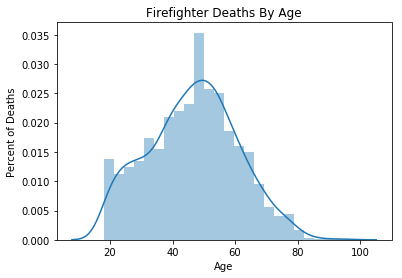

In [241]:
age_min = fire.age.min()
age_max = fire.age.max()
bins = 25

sns.distplot(fire['age'], hist=True, bins=np.linspace(age_min, age_max, bins))
plt.title('Firefighter Deaths By Age')
plt.xlabel('Age')
plt.ylabel('Percent of Deaths')

In [242]:
fire.head()

,age,rank,classification,date_of_incident,date_of_death,cause_of_death,nature_of_death,duty,activity,emergency,property_type,unnamed_13
0,64.0,Firefighter,Volunteer,1999-12-31,2000-01-01,Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property,NaN
1,57.0,Pump Operator/Inspector,Volunteer,2000-01-08,2000-01-08,Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NaN
2,36.0,First Assistant Chief,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road,NaN
3,58.0,Firefighter,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Outdoor Property,NaN
4,37.0,Firefighter,Volunteer,2000-01-15,2000-01-15,Trapped,Suffocation,Training,Other,No,NaN,NaN


In [243]:
fire.classification.unique()

array(['Volunteer', 'Career', 'Paid-on-Call', 'Wildland Full-Time', nan,
       'Wildland Contract', 'Wildland Part-Time', 'Part-Time (Paid)',
       'Industrial'], dtype=object)

In [245]:
fire_sns = sns.load_dateset(fire)

sns.displot(fire_sns, x='age', hue='classification', kind='kde', fill=True)

#sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

TypeError: distplot() got an unexpected keyword argument 'x'